## Bike Index Seattle - Data Prep

### Data cleaning for Seattle streets data, Pt2

[Traffic Volume Data](https://data.seattle.gov/Transportation/Traffic-Flow-Map-Volumes/38vd-gytv)



[2016 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2016-traffic-flow-counts/about)
[2016 Metadata](https://www.seattle.gov/Documents/Departments/SDOT/GIS/2016_Traffic_Flow_Counts_OD.pdf)

[2017 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2017-traffic-flow-counts/about)
[2017 Metadata](https://drive.google.com/file/d/1GEuTEN-oPdtu5zesU1XJKubNt2RX2Lwj/view)

[2018 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2018-traffic-flow-counts/about)
[2018 Metadata](https://drive.google.com/file/d/1H-ooaihoawm8zXjZz_-AhBmwyRiT1FWQ/view)

No volume data availability for 2019-2020. Will take avg. of the 3 years available as proxy? Use rolling avg?

In [27]:
import pandas as pd
import numpy as np

import geopandas as gpd

import requests
import json

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
crashes_merged = pd.read_csv('data/crash_streets.csv', parse_dates=['DATETIME'])

<AxesSubplot:xlabel='DATETIME'>

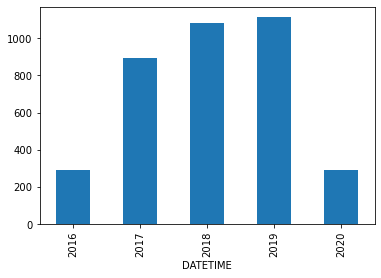

In [5]:
crashes_merged['line_i'].groupby(crashes_merged.DATETIME.dt.year).count().plot(kind='bar')

In [15]:
#url = 'https://data.seattle.gov/resource/38vd-gytv.json'

#r = requests.get(url)

In [30]:
def get_gdf(url):
    
    r = requests.get(url)
    json = r.json()
    
    return gpd.GeoDataFrame.from_features(json['features'])

In [17]:
url_2016 = 'https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson'
url_2017 = 'https://opendata.arcgis.com/datasets/2c37babc94d64bbb938a9b520bc5538c_10.geojson'
url_2018 = 'https://opendata.arcgis.com/datasets/a35aa9249110472ba2c69cc574eff984_11.geojson'

In [80]:
vol_2016 = get_gdf(url_2016)
vol_2017 = get_gdf(url_2017)
vol_2018 = get_gdf(url_2018)

In [81]:
vol_2016.columns

Index(['geometry', 'OBJECTID', 'COUNT_COMPKEY', 'FIRST_STNAME_ORD',
       'FIRST_ARTDESCRIPT', 'FIRST_TRANDESCRIPT', 'COUNTFLAG', 'FLOWSEGID',
       'DOWNTOWN', 'COUNTSTART', 'COUNTAADT', 'COUNTAAWDT', 'ESTIMATE',
       'AWDT_ROUND', 'SHAPE_Length'],
      dtype='object')

In [82]:
vol_2017.columns

Index(['geometry', 'OBJECTID', 'COMPKEY', 'STNAME_ORD', 'FLOWSEGID',
       'DOWNTOWN', 'START_DATE', 'AMPK', 'PMPK', 'AWDT', 'ADT', 'AWDT_ROUNDED',
       'DATAQUALITY', 'FLAGS', 'SHAPE_Length'],
      dtype='object')

In [83]:
vol_2018.columns

Index(['geometry', 'OBJECTID', 'COMPKEY', 'STNAME_ORD', 'FLOWSEGID',
       'DOWNTOWN', 'START_DATE', 'AMPK', 'PMPK', 'AWDT', 'ADT', 'AWDT_ROUNDED',
       'DATAQUALITY', 'FLAGS', 'SHAPE_Length'],
      dtype='object')

In [84]:
vol_2016 = vol_2016.rename(columns = {'COUNTAADT':'ADT_2016', 'COUNTAAWDT':'AWDT_2016'})

In [85]:
gdf = vol_2016.merge(vol_2017.rename(columns = {'ADT':'ADT_2017',
                                               'AWDT':'AWDT_2017'})[['FLOWSEGID','ADT_2017','AWDT_2017']])
gdf = gdf.merge(vol_2018.rename(columns = {'ADT':'ADT_2018',
                                          'AWDT':'AWDT_2018'})[['FLOWSEGID', 'ADT_2018','AWDT_2018']])

In [86]:
gdf.columns

Index(['geometry', 'OBJECTID', 'COUNT_COMPKEY', 'FIRST_STNAME_ORD',
       'FIRST_ARTDESCRIPT', 'FIRST_TRANDESCRIPT', 'COUNTFLAG', 'FLOWSEGID',
       'DOWNTOWN', 'COUNTSTART', 'ADT_2016', 'AWDT_2016', 'ESTIMATE',
       'AWDT_ROUND', 'SHAPE_Length', 'ADT_2017', 'AWDT_2017', 'ADT_2018',
       'AWDT_2018'],
      dtype='object')

<AxesSubplot:>

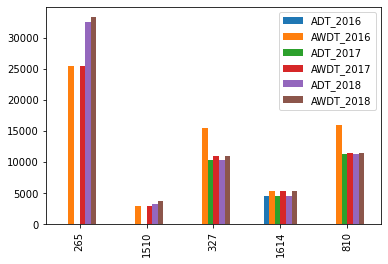

In [98]:
check_ix = np.random.randint(len(gdf)-1, size=5)

cols = ['ADT_2016','AWDT_2016','ADT_2017','AWDT_2017','ADT_2018','AWDT_2018']

gdf.iloc[check_ix][cols].plot(kind='bar')

In [99]:
adt_cols = ['ADT_2016','ADT_2017','ADT_2018']
awdt_cols = ['AWDT_2016','AWDT_2017','AWDT_2018']

In [109]:
np.mean(gdf[adt_cols], axis=1)

0        5508.944333
1       27080.945000
2           0.000000
3        3622.894667
4       46875.028445
            ...     
1832    43529.948667
1833    10823.000000
1834     1274.886000
1835    18361.068667
1836             NaN
Length: 1837, dtype: float64

In [110]:
np.mean(gdf[awdt_cols], axis=1)

0        6829.834667
1       28793.130667
2       23393.888000
3        4421.975667
4       50036.009802
            ...     
1832    49880.071667
1833    12220.000000
1834     1518.143000
1835    19776.093000
1836    19500.000000
Length: 1837, dtype: float64

In [12]:
vol_2016 = r_2016.json()

vol_2016.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [14]:
vol_2016['features'][0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'COUNT_COMPKEY': None,
  'FIRST_STNAME_ORD': 'S SPOKANE ST',
  'FIRST_ARTDESCRIPT': None,
  'FIRST_TRANDESCRIPT': None,
  'COUNTFLAG': 'Y',
  'FLOWSEGID': 2019,
  'DOWNTOWN': 'N',
  'COUNTSTART': '2015-04-03T00:00:00Z',
  'COUNTAADT': 5508.833,
  'COUNTAAWDT': 6829.504,
  'ESTIMATE': None,
  'AWDT_ROUND': 6800,
  'SHAPE_Length': 1118.471354555498},
 'geometry': {'type': 'LineString',
  'coordinates': [[-122.33968006811952, 47.57170032667249],
   [-122.340381034581, 47.57167285690613],
   [-122.34201596676822, 47.571608767643994],
   [-122.34250180837996, 47.57159246219214],
   [-122.34343338437787, 47.57157904015345],
   [-122.34420594883082, 47.571562900713126]]}}